# Data Classification

In [1]:
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

# ToolKit

In [2]:
def loadexcel(x):#, #y = 'Sheet1'):
    run = True
    file= pd.ExcelFile(x)
    names = file.sheet_names
    names = re.sub("'",'', str(names))
    print ("This file contains this tab names:", names )
    while run is True:
        try:
            decision = (input("Choose your tab name? "))
            print ("Your choice is", decision)
            confirm = int(input("This is correct? Please write 1 for yes or 2 for no "))
            if confirm == 1:
                print ("Processing Tab, please wait")
                final_file = file.parse(decision)
                return final_file
                run = False
            else:
                print ('Choose the right tab!') 
        except Exception as e:
            print ("There is an error: ", e)
            print ("Please Try Again! :)")
            continue
            
def loading_excel():
    x = input('\033[94m'+'Please write your file location: ' +'\033[0m')
    real_x = path.realpath(x)
    doc = loadexcel(real_x) 
    return doc

In [3]:
def mergefield(x, jo=""):
    bold = "\033[1m"
    end =  "\033[0m"
    GREEN = '\033[92m'
    i=-1
    names = list(x)
    b = dict(enumerate(names))
    print ("This file contains this columns:" )
    for name in names:
        i=i+1
        print(str(i)+"."+" "+ name)
    print (bold+GREEN+"Choose the columns you want to merge."+end)
    election = input().split(",")
    item = list(map(int, election))
    convert = [b[y] for y in item]
    print("Your Choice is", convert)
    stripped = x[convert].fillna('').apply(lambda x: x.str.strip())
    join_symb = jo
    stripped = stripped.astype(str).apply(join_symb.join, axis=1)
    return stripped

In [4]:
def filtersame(x,y):  
    words_equal = []
    for word in x:
        if word in y:
            words_equal += [word]
    return words_equal

def removequal(x,y):  
    words_dif = []
    for word in y:
        if word not in x:
            words_dif += [word]
    return words_dif

In [5]:
from nltk.corpus import stopwords #create a variable to delete common words

def stopwords_list( lan ='spanish'):
    lan = str(lan)
    stopwords_es = stopwords.words(lan)
    stop_es = pd.DataFrame(stopwords_es)
    stop_es.columns =['StopWords']
    es_pal = '\\b'+stop_es['StopWords'].str.lower().astype(str)+'\\b'
    es_pal = es_pal.tolist()
    return es_pal

## Loading Clean Historical DB

### Necessary Libraries

In [6]:
from os import path
import pandas as pd
import re #regex
from nltk.stem.lancaster import LancasterStemmer

### Loading Files

In [7]:
#C:\Users\Gpardo\Desktop\Clasification\DB\Peru\DB Historical Peru.xlsx
db_hist = loading_excel() #Modelo
db_hist.head()

Please write your file location: C:\Users\Gpardo\Desktop\Clasification\DB\Peru\DB Historical Peru.xlsx
This file contains this tab names: [Sheet1]
Choose your tab name? Sheet1
Your choice is Sheet1
This is correct? Please write 1 for yes or 2 for no 1
Processing Tab, please wait


,Timescale,DESCRIPCION COMERCIAL 1,NOMBRE COMERCIAL,MARCA,MODELO,CARACTERISTICAS,Processed,Vendor,Product,Model Name,CPU Type,New Vendor,Unnamed: 12
0,2018Q1,RAID SHIELD RAID SHIELD S/M,,,,,Trash,NaN,NaN,NaN,NaN,NaN,NaN
1,2018Q1,"AGUA DE COCO, SIGMA ALDRICH, S/M",,,,,Trash,NaN,NaN,NaN,NaN,NaN,NaN
2,2018Q1,SERVIDOR DE COMPUTO DELL R530,,,,,Trash,NaN,NaN,NaN,NaN,NaN,NaN
3,2018Q1,"REFRIGERADOR, ARCTIKO, PR1400",,,,,Trash,NaN,NaN,NaN,NaN,NaN,NaN
4,2018Q1,"ENZIMAS DE LABORATORIO, NEW ENGLAND BIOLABS, S/M",,,,,Trash,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
working_db = db_hist.copy()
working_db['DESCRIPCION COMERCIAL 1'] = working_db['DESCRIPCION COMERCIAL 1'].str.replace(r"^(\W+)","",case=False)
working_db['DESCRIPCION COMERCIAL 1'] = working_db['DESCRIPCION COMERCIAL 1'].str.replace(r"\, \,",", ",case=False)
#//
#working_db[['Descripcion', 'Marca','Modelo']] = working_db['DESCRIPCION COMERCIAL 1'].str.split(',', 2, expand=True)
working_db.iloc[30690]

Timescale                                                      2017Q4
DESCRIPCION COMERCIAL 1    UNIDAD DE PROCESO DIGITAL, LENOVO, S28600 
NOMBRE COMERCIAL                         ,,UNIDAD DE PROCESO DIGITAL 
MARCA                                                        ,LENOVO 
MODELO                                                        S28600 
CARACTERISTICAS                Desktop TC M710q I56400T 8G 1TB W10DG 
Processed                                                       Trash
Vendor                                                            NaN
Product                                                           NaN
Model Name                                                        NaN
CPU Type                                                          NaN
New Vendor                                                        NaN
Unnamed: 12                                                       NaN
Name: 30690, dtype: object

In [9]:
sans_comma = working_db[~working_db['DESCRIPCION COMERCIAL 1'].str.contains('(\w)+(,)')]

In [ ]:
'''
import datetime
trash_out = r'C:\Users\Gpardo\Desktop\Clasification\DB\Peru\DB_Revision' 
save = datetime.datetime.now().strftime("%y_%m_%d")
dir = trash_out +"_"+str(save)+".xlsx"
print(dir)

writer = pd.ExcelWriter(dir, engine='xlsxwriter')

#Convert the dataframe to an XlsxWriter Excel object.
working_db.to_excel(writer, sheet_name='Final Database')
sans_comma.to_excel(writer, sheet_name='Sin Coma')
# Close the Pandas Excel writer and output the Excel file.
writer.save()
'''

In [11]:
#working_db[working_db['DESCRIPCION COMERCIAL 1']=='TABLETS']
working_db['Working'] = mergefield(working_db, jo=" ") #1,5
working_db['Working'] = working_db['Working'].str.replace(r"\W"," ",case=False)
working_db['Working'] = working_db['Working'].str.replace(r" +"," ",case=False)
working_db.head()

This file contains this columns:
0. Timescale
1. DESCRIPCION COMERCIAL 1
2. NOMBRE COMERCIAL
3. MARCA
4. MODELO
5. CARACTERISTICAS
6. Processed
7. Vendor
8. Product
9. Model Name
10. CPU Type
11. New Vendor
12. Unnamed: 12
Choose the columns you want to merge.
1,5
Your Choice is ['DESCRIPCION COMERCIAL 1', 'CARACTERISTICAS']


,Timescale,DESCRIPCION COMERCIAL 1,NOMBRE COMERCIAL,MARCA,MODELO,CARACTERISTICAS,Processed,Vendor,Product,Model Name,CPU Type,New Vendor,Unnamed: 12,Working
0,2018Q1,RAID SHIELD RAID SHIELD S/M,,,,,Trash,NaN,NaN,NaN,NaN,NaN,NaN,RAID SHIELD RAID SHIELD S M
1,2018Q1,"AGUA DE COCO, SIGMA ALDRICH, S/M",,,,,Trash,NaN,NaN,NaN,NaN,NaN,NaN,AGUA DE COCO SIGMA ALDRICH S M
2,2018Q1,SERVIDOR DE COMPUTO DELL R530,,,,,Trash,NaN,NaN,NaN,NaN,NaN,NaN,SERVIDOR DE COMPUTO DELL R530
3,2018Q1,"REFRIGERADOR, ARCTIKO, PR1400",,,,,Trash,NaN,NaN,NaN,NaN,NaN,NaN,REFRIGERADOR ARCTIKO PR1400
4,2018Q1,"ENZIMAS DE LABORATORIO, NEW ENGLAND BIOLABS, S/M",,,,,Trash,NaN,NaN,NaN,NaN,NaN,NaN,ENZIMAS DE LABORATORIO NEW ENGLAND BIOLABS S M


In [128]:
working_db2 = working_db[['Timescale','Working','Processed','Vendor','Product','Model Name']]
Models_db = working_db2[working_db2['Processed']=='Model']
Models_db['Type'] = mergefield(Models_db, jo=", ") #3,4
Models_db['Category Codes'] = Models_db['Type'].astype('category').cat.codes
models_dict = Models_db[['Type','Category Codes']].set_index('Category Codes')['Type'].to_dict()
print(models_dict)
Models_db.head()

This file contains this columns:
0. Timescale
1. Working
2. Processed
3. Vendor
4. Product
5. Model Name
Choose the columns you want to merge.
3,4,5
Your Choice is ['Vendor', 'Product', 'Model Name']
{188: 'Miray, Slate Tablet, Others 7" 8GB WiFi', 190: 'Others, Slate Tablet, Others 7" 8GB WiFi', 116: 'HP Inc, Slate Tablet, ElitePad 1000 G2 64GB WiFI', 223: 'Samsung, Slate Tablet, Galaxy Tab E 9.6" 8GB WiFi', 240: 'Zebra, Slate Tablet, ET50', 108: 'Getac, Slate Tablet, F110', 93: 'Boxlight, Slate Tablet, Others 7" 8GB 3G', 161: 'Lenovo, Slate Tablet, Tab 4 10 16GB 4G', 83: 'Apple, Slate Tablet, iPad mini 4 16GB Wi-Fi', 69: 'Apple, Detachable Tablet, iPad Pro 9.7 32GB WiFi', 193: 'Panasonic, Slate Tablet, FZ-G1 128GB 4G', 25: 'Advance, Slate Tablet, Advance  Prime  7" 8GB 3G', 27: 'Advance, Slate Tablet, Advance  Prime  7" 8GB WiFi', 29: 'Advance, Slate Tablet, Advance  SmartPad  10" 16GB WiFi', 30: 'Advance, Slate Tablet, Advance  SmartPad  10.1" 16GB 3G', 22: 'Advance, Slate Tablet, A

,Timescale,Working,Processed,Vendor,Product,Model Name,Type,Category Codes
13,2018Q1,COMPUTADORA MIRAY MIDM K703 TABRK3MULTSC,Model,Miray,Slate Tablet,"Others 7"" 8GB WiFi","Miray, Slate Tablet, Others 7"" 8GB WiFi",188
14,2018Q1,TABLET PC MIRAY A731 SC7731 QUAD CORE PANTALLA...,Model,Others,Slate Tablet,"Others 7"" 8GB WiFi","Others, Slate Tablet, Others 7"" 8GB WiFi",190
338,2018Q1,TABLET HP HSTNN C78C HP ELITEPAD 1000 G2 TABLET,Model,HP Inc,Slate Tablet,ElitePad 1000 G2 64GB WiFI,"HP Inc, Slate Tablet, ElitePad 1000 G2 64GB WiFI",116
339,2018Q1,COMPUTADORA SAMSUNG GALAXY TABE SM T561 TABZZZ...,Model,Samsung,Slate Tablet,"Galaxy Tab E 9.6"" 8GB WiFi","Samsung, Slate Tablet, Galaxy Tab E 9.6"" 8GB WiFi",223
423,2018Q1,Computadora ZEBRA ET50PE TABZZZLCDZZZ,Model,Zebra,Slate Tablet,ET50,"Zebra, Slate Tablet, ET50",240


# Remove StopWords

In [129]:
working_db2 = Models_db.copy()
esp_list= stopwords_list()
working_db2['Working'] = working_db2['Working'].str.replace('|'.join(esp_list), "", case=False).str.replace('\s\s+', " ", case=False)
working_db2.head()

,Timescale,Working,Processed,Vendor,Product,Model Name,Type,Category Codes
13,2018Q1,COMPUTADORA MIRAY MIDM K703 TABRK3MULTSC,Model,Miray,Slate Tablet,"Others 7"" 8GB WiFi","Miray, Slate Tablet, Others 7"" 8GB WiFi",188
14,2018Q1,TABLET PC MIRAY A731 SC7731 QUAD CORE PANTALLA...,Model,Others,Slate Tablet,"Others 7"" 8GB WiFi","Others, Slate Tablet, Others 7"" 8GB WiFi",190
338,2018Q1,TABLET HP HSTNN C78C HP ELITEPAD 1000 G2 TABLET,Model,HP Inc,Slate Tablet,ElitePad 1000 G2 64GB WiFI,"HP Inc, Slate Tablet, ElitePad 1000 G2 64GB WiFI",116
339,2018Q1,COMPUTADORA SAMSUNG GALAXY TABE SM T561 TABZZZ...,Model,Samsung,Slate Tablet,"Galaxy Tab E 9.6"" 8GB WiFi","Samsung, Slate Tablet, Galaxy Tab E 9.6"" 8GB WiFi",223
423,2018Q1,Computadora ZEBRA ET50PE TABZZZLCDZZZ,Model,Zebra,Slate Tablet,ET50,"Zebra, Slate Tablet, ET50",240


# Stem Only Description

In [130]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('spanish')
stemmer.stem('cuando')

'cuand'

In [131]:
#db_hist_trash['Descripcion_Clean'] = db_hist_trash['Descripcion_Clean'].apply(lambda x : filter(None,x.split(" "))).apply(lambda x : [stemmer.stem(y) for y in x]).apply(lambda x : " ".join(x))

# Rearrange Database

In [132]:
import numpy as np
np.random.seed(0)
unique_db_org = working_db2.reset_index(drop=True)
df = unique_db_org.reindex(np.random.permutation(unique_db_org.index))
df.head()

,Timescale,Working,Processed,Vendor,Product,Model Name,Type,Category Codes
156,2018Q1,Computadora APPLE A1822 TABZZZZZZZZZ,Model,Apple,Detachable Tablet,iPad Pro 9.7 32GB WiFi,"Apple, Detachable Tablet, iPad Pro 9.7 32GB WiFi",69
1010,2017Q4,Computadora SAMSUNG SM T113NU TABZZZLCDZZZ,Model,Samsung,Slate Tablet,"Galaxy Tab 3 Lite 7"" 8GB WiFi","Samsung, Slate Tablet, Galaxy Tab 3 Lite 7"" 8G...",212
2114,2017Q2,Computadora SAMSUNG SM P355M TAB ZZZQUAD CORE ...,Model,Samsung,Slate Tablet,Galaxy Tab A 8.0 2017 WiFi,"Samsung, Slate Tablet, Galaxy Tab A 8.0 2017 WiFi",220
723,2017Q4,COMPUTADORA ADVANCE SP5701 AT I201 TABINTTipZZZ,Model,Advance,Slate Tablet,"Advance SmartPad 10.1"" 16GB 3G","Advance, Slate Tablet, Advance SmartPad 10.1""...",33
1380,2017Q3,Computadora SAMSUNG SM T813,Model,Samsung,Detachable Tablet,Galaxy Tab S2 9.7 32GB WiFi,"Samsung, Detachable Tablet, Galaxy Tab S2 9.7 ...",202


# Words contained

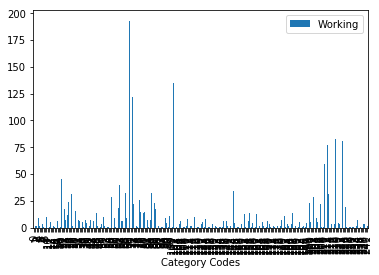

In [133]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df[['Working','Category Codes']].groupby('Category Codes').count().plot.bar(ylim=0)
plt.show()

# Scikit Learn Approach

In [134]:
df.head()

,Timescale,Working,Processed,Vendor,Product,Model Name,Type,Category Codes
156,2018Q1,Computadora APPLE A1822 TABZZZZZZZZZ,Model,Apple,Detachable Tablet,iPad Pro 9.7 32GB WiFi,"Apple, Detachable Tablet, iPad Pro 9.7 32GB WiFi",69
1010,2017Q4,Computadora SAMSUNG SM T113NU TABZZZLCDZZZ,Model,Samsung,Slate Tablet,"Galaxy Tab 3 Lite 7"" 8GB WiFi","Samsung, Slate Tablet, Galaxy Tab 3 Lite 7"" 8G...",212
2114,2017Q2,Computadora SAMSUNG SM P355M TAB ZZZQUAD CORE ...,Model,Samsung,Slate Tablet,Galaxy Tab A 8.0 2017 WiFi,"Samsung, Slate Tablet, Galaxy Tab A 8.0 2017 WiFi",220
723,2017Q4,COMPUTADORA ADVANCE SP5701 AT I201 TABINTTipZZZ,Model,Advance,Slate Tablet,"Advance SmartPad 10.1"" 16GB 3G","Advance, Slate Tablet, Advance SmartPad 10.1""...",33
1380,2017Q3,Computadora SAMSUNG SM T813,Model,Samsung,Detachable Tablet,Galaxy Tab S2 9.7 32GB WiFi,"Samsung, Detachable Tablet, Galaxy Tab S2 9.7 ...",202


# Splitting Databse

In [135]:
features = df['Working'].str.lower()
labels = df['Category Codes']

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=0)

In [137]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer().fit(X_train)

max(vect.get_feature_names(), key=lambda token:len(token))

'comerciamaterial'

In [138]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


X_train_vectorized = vect.transform(X_train)
clf = MultinomialNB(alpha=0.1)
clf.fit(X_train_vectorized, y_train)
predictions = clf.predict(vect.transform(X_test))


In [139]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print('F1 Measure: %.3f' % f1_score(y_test.astype(int),predictions, average='micro'))
print('Precision: %.3f' % precision_score(y_test.astype(int),predictions, average='micro'))
print('F1 Measure: %.3f' % recall_score(y_test.astype(int),predictions, average='micro'))

F1 Measure: 0.652
Precision: 0.652
F1 Measure: 0.652


In [140]:
result = pd.DataFrame(X_test)
result = result.reset_index(drop=True)
finalNB = result.join(pd.DataFrame(predictions, columns = (['Predictions Countvectorizer'])))
finalNB.head()

,Working,Predictions Countvectorizer
0,computadora samsung sm t560 tabzzzlcdzzz,223
1,tablet etoway e99 tablet with accesories acces...,101
2,computadora samsung sm p585m tabzzzlcdzzz,214
3,tablet hp hstnn c78c recoleccion datos clinicos,115
4,computadora samsung sm p350 tabzzzlcdzzz,224


In [141]:
finalNB[finalNB['Predictions Countvectorizer']==0].head()

,Working,Predictions Countvectorizer


# Tfidf Vectorizer

In [142]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(min_df=3).fit(X_train)
X_train_vectorized = vect.transform(X_train)
model = MultinomialNB(alpha=0.1)
model.fit(X_train_vectorized, y_train)
predictions = model.predict(vect.transform(X_test))
predictions

array([223, 101, 214, 115, 224, 224, 218, 223, 218, 144, 210,  69, 223,
       212, 207,  76,  37, 101,  45, 144,  25,  60, 190, 214, 101, 234,
       224,   8,  76,  69, 212,  80,  62,  57, 144,  57,  69, 187, 224,
        62, 210,  69,  85,  71, 128, 212, 164,  56, 137,  71,  71, 101,
        57, 139, 223, 101, 212, 224, 190,  57,  69,  20, 101, 122, 139,
       218, 199,  69, 166, 190,  57,  57, 218,  57,  55, 210,  81,  71,
        57, 218,  85,  62,  45,  57,  76, 111, 128, 192, 224,  56,  27,
        66,  27, 106, 101,  27, 101, 219, 218,  44,  66, 225,  81,  20,
       218, 101, 201, 124, 139,  71,  78, 199,  69,  80, 187,   9, 224,
       223, 128,  60, 101,  69, 101,  20,  60,  69, 223, 201,  27, 199,
        69, 101,  80,  81, 218,  71,  71, 224,  72, 223,  20,  69,  20,
        78, 199,  66, 223, 101, 223, 190, 156,  62,  71, 219, 218,  30,
        71,  30, 137, 224,  76,  44, 202, 223, 190, 212, 101,  76,  78,
       202,  69, 224,  71, 181, 156,  69,  60, 212, 144, 214,  2

In [143]:
result = pd.DataFrame(X_test)
result = result.reset_index(drop=True)
print(len(result))
print(len(pd.DataFrame(predictions, columns = (['Predictions TFIDF']))))
finalTfidf = result.join(pd.DataFrame(predictions, columns = (['Predictions TFIDF'])))
finalTfidf.head()

666
666


,Working,Predictions TFIDF
0,computadora samsung sm t560 tabzzzlcdzzz,223
1,tablet etoway e99 tablet with accesories acces...,101
2,computadora samsung sm p585m tabzzzlcdzzz,214
3,tablet hp hstnn c78c recoleccion datos clinicos,115
4,computadora samsung sm p350 tabzzzlcdzzz,224


In [144]:
from sklearn.svm import LinearSVC

vect = TfidfVectorizer(min_df=3).fit(X_train)
X_train_vectorized = vect.transform(X_train)
model = LinearSVC()
model.fit(X_train_vectorized, y_train)
predictions = model.predict(vect.transform(X_test))

In [145]:
print('F1 Measure: %.3f' % f1_score(y_test.astype(int),predictions, average='micro'))
print('Precision: %.3f' % precision_score(y_test.astype(int),predictions, average='micro'))
print('F1 Measure: %.3f' % recall_score(y_test.astype(int),predictions, average='micro'))

F1 Measure: 0.710
Precision: 0.710
F1 Measure: 0.710


In [146]:
final_SVC = result.join(pd.DataFrame(predictions, columns = (['Predictions LinearSVC'])))
final_SVC.head()

,Working,Predictions LinearSVC
0,computadora samsung sm t560 tabzzzlcdzzz,223
1,tablet etoway e99 tablet with accesories acces...,101
2,computadora samsung sm p585m tabzzzlcdzzz,214
3,tablet hp hstnn c78c recoleccion datos clinicos,115
4,computadora samsung sm p350 tabzzzlcdzzz,219


In [147]:
print('F1 Measure: %.3f' % f1_score(y_test.astype(int),predictions, average='micro'))
print('Precision: %.3f' % precision_score(y_test.astype(int),predictions, average='micro'))
print('F1 Measure: %.3f' % recall_score(y_test.astype(int),predictions, average='micro'))



F1 Measure: 0.710
Precision: 0.710
F1 Measure: 0.710


In [148]:
names = ['Model','Trash']
#model_dict

In [149]:
from sklearn import metrics
print(metrics.classification_report(y_test.astype(int),predictions))#, target_names=names))

             precision    recall  f1-score   support

          0       0.50      1.00      0.67         1
          2       0.00      0.00      0.00         1
          3       1.00      1.00      1.00         2
          5       1.00      1.00      1.00         1
          6       0.00      0.00      0.00         1
          8       1.00      1.00      1.00         2
          9       0.80      1.00      0.89         4
         10       1.00      1.00      1.00         1
         11       0.00      0.00      0.00         1
         12       0.00      0.00      0.00         1
         16       0.00      0.00      0.00         0
         17       0.00      0.00      0.00         0
         18       0.00      0.00      0.00         1
         19       0.00      0.00      0.00         1
         20       0.62      0.80      0.70        10
         22       1.00      1.00      1.00         2
         23       1.00      1.00      1.00         2
         24       1.00      0.40      0.57   

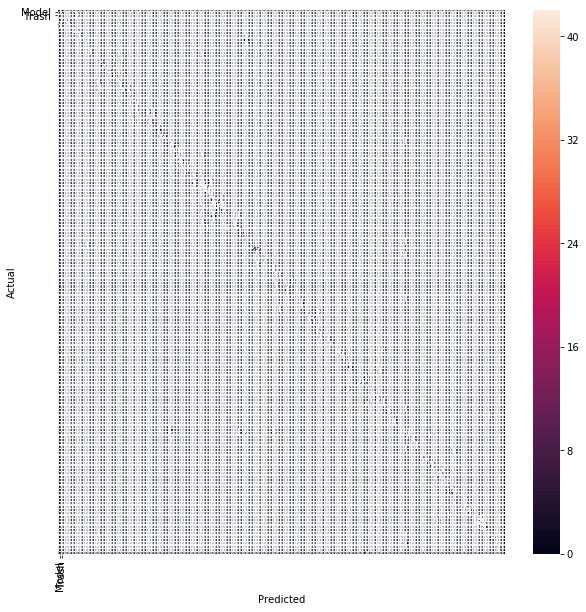

In [150]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test.astype(int),predictions)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=names, yticklabels=names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Model Selection

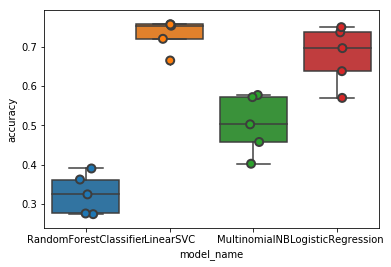

In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, vect.transform(features), labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [152]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.730650
LogisticRegression        0.678330
MultinomialNB             0.502652
RandomForestClassifier    0.325772
Name: accuracy, dtype: float64

In [153]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC


# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    vect.transform(features), labels, test_size=0.5, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, target_names=names))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 1000, 'kernel': 'linear'}

Grid scores on development set:

0.001 (+/-0.001) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.001 (+/-0.001) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.011 (+/-0.008) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.001 (+/-0.001) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.194 (+/-0.194) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.011 (+/-0.008) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.505 (+/-0.247) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.194 (+/-0.194) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.462 (+/-0.326) for {'C': 1, 'kernel': 'linear'}
0.544 (+/-0.241) for {'C': 10, 'kernel': 'linear'}
0.553 (+/-0.245) for {'C': 100, 'kernel': 'linear'}
0.553 (+/-0.247) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full 

# Final Classifier

In [154]:
#C:\Users\Gpardo\Desktop\Clasification\Peru\DB_Classifier_Peru_18_07_17.xlsx
db_to_classify = loading_excel() #Modelo
db_to_classify.head()

Please write your file location: C:\Users\Gpardo\Desktop\Clasification\Peru\DB_Classifier_Peru_18_07_17.xlsx
This file contains this tab names: [Final Database, Sheet1, DB Check]
Choose your tab name? Final Database
Your choice is Final Database
This is correct? Please write 1 for yes or 2 for no 1
Processing Tab, please wait


,DESCRIPCION COMERCIAL 1,CARACTERISTICAS,CANTIDAD,PRECIO UNITARIO UNIDAD COMERCIAL,Index Field,Predictions SVC,Label,Correct Label,Type
0,"LAPTOP, DELL, LATITUDE 7490",LAPTOP,25,2056.270000,LAPTOP DELL LATITUDE 7490 LAPTOP,1,Trash,Trash,pc
1,"TELEFONO CELULAR, APPLE, IPHONE 7 PLUS",TELEFONO CELULAR,5,816.187988,TELEFONO CELULAR APPLE IPHONE 7 PLUS TELEFONO ...,1,Trash,Trash,Trash
2,"MOUSE, DELL, MO56UC",,30,12.000000,MOUSE DELL MO56UC,1,Trash,Trash,Trash
3,"SERVIDOR, CISCO, ASA5516-X",,1,2832.000000,SERVIDOR CISCO ASA5516 X,1,Trash,Trash,Trash
4,"REACTIVO DE LABORATORIO, BIOREZA, S/M",,3,312.333333,REACTIVO DE LABORATORIO BIOREZA S M,1,Trash,Trash,Trash


In [155]:
db_final = db_to_classify[['DESCRIPCION COMERCIAL 1','CARACTERISTICAS','CANTIDAD','PRECIO UNITARIO UNIDAD COMERCIAL','Index Field','Predictions SVC','Correct Label']]
db_final['Category Codes'] = db_final['Correct Label'].astype('category').cat.codes
model_dict = db_final[['Correct Label','Category Codes']].set_index('Category Codes')['Correct Label'].to_dict()
#db_final.loc[db_final['Correct Label']=='Trash','Encode']=1
#db_final.loc[db_final['Correct Label']=='Model','Encode']=0
names = ['Model','Trash']
db_final.head()

,DESCRIPCION COMERCIAL 1,CARACTERISTICAS,CANTIDAD,PRECIO UNITARIO UNIDAD COMERCIAL,Index Field,Predictions SVC,Correct Label,Category Codes
0,"LAPTOP, DELL, LATITUDE 7490",LAPTOP,25,2056.270000,LAPTOP DELL LATITUDE 7490 LAPTOP,1,Trash,1
1,"TELEFONO CELULAR, APPLE, IPHONE 7 PLUS",TELEFONO CELULAR,5,816.187988,TELEFONO CELULAR APPLE IPHONE 7 PLUS TELEFONO ...,1,Trash,1
2,"MOUSE, DELL, MO56UC",,30,12.000000,MOUSE DELL MO56UC,1,Trash,1
3,"SERVIDOR, CISCO, ASA5516-X",,1,2832.000000,SERVIDOR CISCO ASA5516 X,1,Trash,1
4,"REACTIVO DE LABORATORIO, BIOREZA, S/M",,3,312.333333,REACTIVO DE LABORATORIO BIOREZA S M,1,Trash,1


# Metrics

In [156]:
from sklearn import metrics
predictions = db_final['Predictions SVC']
y_test = db_final['Category Codes']
print(metrics.classification_report(y_test,predictions, target_names=names))

             precision    recall  f1-score   support

      Model       1.00      0.96      0.98       830
      Trash       1.00      1.00      1.00     19701

avg / total       1.00      1.00      1.00     20531



In [157]:
db_final = db_final[db_final['Category Codes']==0]
db_final['Index Field'] = mergefield(db_final, jo=" ") #0,1
db_final['Index Field'] = db_final['Index Field'].str.replace(r"\W"," ",case=False).str.replace(r"\s\s+"," ",case=False)
db_final.head()

This file contains this columns:
0. DESCRIPCION COMERCIAL 1
1. CARACTERISTICAS
2. CANTIDAD
3. PRECIO UNITARIO UNIDAD COMERCIAL
4. Index Field
5. Predictions SVC
6. Correct Label
7. Category Codes
Choose the columns you want to merge.
0,1
Your Choice is ['DESCRIPCION COMERCIAL 1', 'CARACTERISTICAS']


,DESCRIPCION COMERCIAL 1,CARACTERISTICAS,CANTIDAD,PRECIO UNITARIO UNIDAD COMERCIAL,Index Field,Predictions SVC,Correct Label,Category Codes
246,"COMPUTADORA, MIRAY, MIDM-706",TABZZZZZZZZZ,1,34.000000,COMPUTADORA MIRAY MIDM 706 TABZZZZZZZZZ,0,Model,0
247,"COMPUTADORA, MIRAY, MIDM-7701",TABZZZZZZZZZ,2,41.000000,COMPUTADORA MIRAY MIDM 7701 TABZZZZZZZZZ,0,Model,0
248,"COMPUTADORA, MIRAY, MIDM-8803",TABZZZZZZZZZ,2,53.250000,COMPUTADORA MIRAY MIDM 8803 TABZZZZZZZZZ,0,Model,0
249,"COMPUTADORA, MIRAY, MIDM_K708TV",TABMTKPANZZZ,700,52.925631,COMPUTADORA MIRAY MIDM_K708TV TABMTKPANZZZ,0,Model,0
250,"COMPUTADORA, MIRAY, MIDM-706",TABROCPANZZZ,800,36.174412,COMPUTADORA MIRAY MIDM 706 TABROCPANZZZ,0,Model,0


In [158]:
db_names_class = db_final['Index Field'].str.lower()

In [159]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

features
labels

vect = TfidfVectorizer(min_df=3, ngram_range=(1, 2)).fit(features)
X_train_vectorized = vect.transform(features)
model = SVC(C=1000, gamma=0.001,kernel='rbf')
model.fit(X_train_vectorized, labels)
predictions = model.predict(vect.transform(db_names_class))

In [160]:
result = db_final.reset_index()
finalSVC = result.join(pd.DataFrame(predictions, columns = (['Predictions Product'])))
finalSVC['Vendors Label'] = finalSVC['Predictions Product']
finalSVC.replace({"Vendors Label": models_dict}, inplace=True)
finalSVC[['Vendor','Product','Model Name']] = finalSVC['Vendors Label'].str.split(',', 2, expand=True)

#model_dict
#finalSVC['Label'] = finalSVC['Predictions SVC']
#finalSVC.replace({"Label": model_dict}, inplace=True)
#finalSVC.head()
finalSVC

,index,DESCRIPCION COMERCIAL 1,CARACTERISTICAS,CANTIDAD,PRECIO UNITARIO UNIDAD COMERCIAL,Index Field,Predictions SVC,Correct Label,Category Codes,Predictions Product,Vendors Label,Vendor,Product,Model Name
0,246,"COMPUTADORA, MIRAY, MIDM-706",TABZZZZZZZZZ,1,34.000000,COMPUTADORA MIRAY MIDM 706 TABZZZZZZZZZ,0,Model,0,187,"Miray, Slate Tablet, Others",Miray,Slate Tablet,Others
1,247,"COMPUTADORA, MIRAY, MIDM-7701",TABZZZZZZZZZ,2,41.000000,COMPUTADORA MIRAY MIDM 7701 TABZZZZZZZZZ,0,Model,0,187,"Miray, Slate Tablet, Others",Miray,Slate Tablet,Others
2,248,"COMPUTADORA, MIRAY, MIDM-8803",TABZZZZZZZZZ,2,53.250000,COMPUTADORA MIRAY MIDM 8803 TABZZZZZZZZZ,0,Model,0,187,"Miray, Slate Tablet, Others",Miray,Slate Tablet,Others
3,249,"COMPUTADORA, MIRAY, MIDM_K708TV",TABMTKPANZZZ,700,52.925631,COMPUTADORA MIRAY MIDM_K708TV TABMTKPANZZZ,0,Model,0,187,"Miray, Slate Tablet, Others",Miray,Slate Tablet,Others
4,250,"COMPUTADORA, MIRAY, MIDM-706",TABROCPANZZZ,800,36.174412,COMPUTADORA MIRAY MIDM 706 TABROCPANZZZ,0,Model,0,187,"Miray, Slate Tablet, Others",Miray,Slate Tablet,Others
5,251,"COMPUTADORA, MIRAY, MIDM-706",TABZZZZZZZZZ,200,35.200000,COMPUTADORA MIRAY MIDM 706 TABZZZZZZZZZ,0,Model,0,187,"Miray, Slate Tablet, Others",Miray,Slate Tablet,Others
6,252,"COMPUTADORA, MIRAY, MIDM_K708TV",TABZZZZZZZZZ,300,51.500000,COMPUTADORA MIRAY MIDM_K708TV TABZZZZZZZZZ,0,Model,0,187,"Miray, Slate Tablet, Others",Miray,Slate Tablet,Others
7,389,"TABLET, LENOVO, LENOVO TB-7304F",LENOVO TB-7304F TAB 1G 16GBL-PE,3000,81.922667,TABLET LENOVO LENOVO TB 7304F LENOVO TB 7304F ...,0,Model,0,161,"Lenovo, Slate Tablet, Tab 4 10 16GB 4G",Lenovo,Slate Tablet,Tab 4 10 16GB 4G
8,391,"TABLET, LENOVO, TB-7304F",UNIDADES // CODIGO DE HOMOLOGACION: TRSS39597;...,1000,80.443000,TABLET LENOVO TB 7304F UNIDADES CODIGO DE HOMO...,0,Model,0,161,"Lenovo, Slate Tablet, Tab 4 10 16GB 4G",Lenovo,Slate Tablet,Tab 4 10 16GB 4G
9,546,Computadora LENOVO LENOVO TB-X103F,TABQUALCDTSC,1920,117.093229,Computadora LENOVO LENOVO TB X103F TABQUALCDTSC,1,Model,0,161,"Lenovo, Slate Tablet, Tab 4 10 16GB 4G",Lenovo,Slate Tablet,Tab 4 10 16GB 4G


In [161]:
import datetime
trash_out = r'C:\Users\Gpardo\Desktop\Clasification\Peru\DB_Product Classify_Peru' 
save = datetime.datetime.now().strftime("%y_%m_%d")
dir = trash_out +"_"+str(save)+".xlsx"
print(dir)

writer = pd.ExcelWriter(dir, engine='xlsxwriter')

#Convert the dataframe to an XlsxWriter Excel object.
finalSVC.to_excel(writer, sheet_name='Final Database Classify')
# Close the Pandas Excel writer and output the Excel file.
writer.save()


C:\Users\Gpardo\Desktop\Clasification\Peru\DB_Product Classify_Peru_18_07_17.xlsx
